In [19]:
from qiskit import QuantumCircuit, transpile
import numpy as np
from matplotlib import pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from scipy.stats import binom

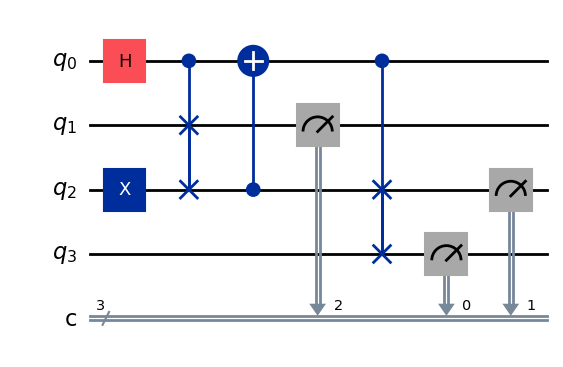

In [3]:
# one peg 
qc = QuantumCircuit(4,3)
qc.h(0)
qc.x(2)
qc.cswap(0,1,2)
qc.cx(2,0)
qc.cswap(0,2,3)
qc.measure([3,2,1], [0,1,2])
qc.draw('mpl')

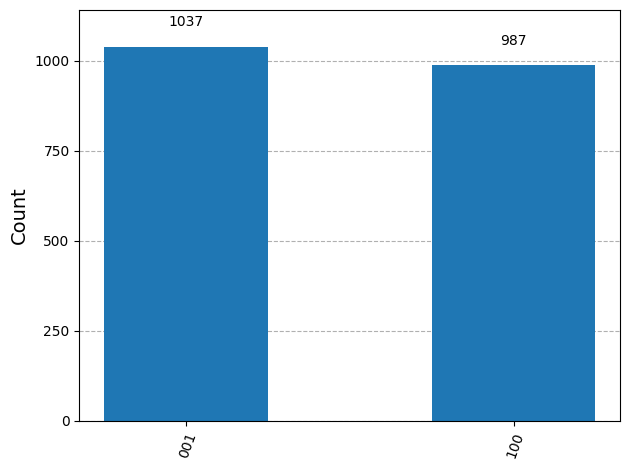

In [4]:
simulator = AerSimulator()
qc_t = transpile(qc, simulator)
job = simulator.run(qc_t, shots=2024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

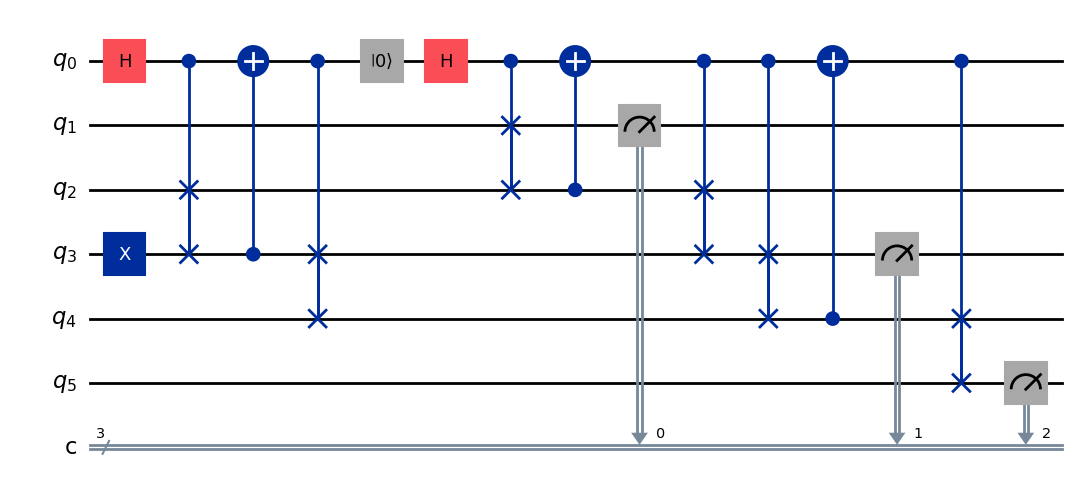

In [11]:
# three peg 

qc = QuantumCircuit(6,3)
qc.h(0)
qc.x(3)
qc.cswap(0,2,3)
qc.cx(3,0)
qc.cswap(0,3,4)
qc.reset(0)
qc.h(0)
n=1
while (n != 5):
    qc.cswap(0,n,n+1)
    if (n < 4):
        if (n != 2):
            qc.cx(n+1,0)
    n += 1
qc.measure([1,3,5], [0,1,2])
qc.draw('mpl')

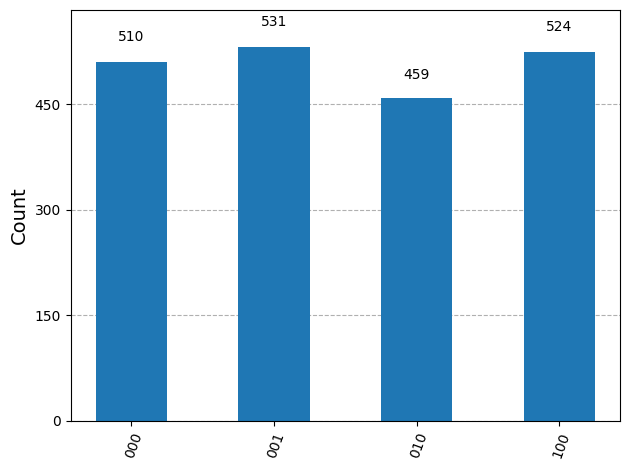

In [12]:
simulator = AerSimulator()
qc_t = transpile(qc, simulator)
job = simulator.run(qc_t, shots=2024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [7]:
def num_of_qbits(n):
    bits = 2*(n+1) # total qubits for n-level board = n+(n+1)+1
    return bits

def one_peg(qc, start):
    qc.cswap(0, start-1, start)
    qc.cx(start, 0)
    qc.cswap(0, start, start+1)
    return qc 

def measure_gb(qc):
    qb = qc.num_qubits
    cb = 0
    for i in range(1, qb, 2): 
        qc.measure(i, cb)
        cb += 1
    return qc

def multi_swap(qc, start, curr, count):
    n=curr
    max = start+count
    while (n != max):
        qc.cswap(0,n,n+1)
        if (n < (max - 1)):
            qc.cx(n+1,0)
        n += 1
    return qc 
print(num_of_qbits(4))

10


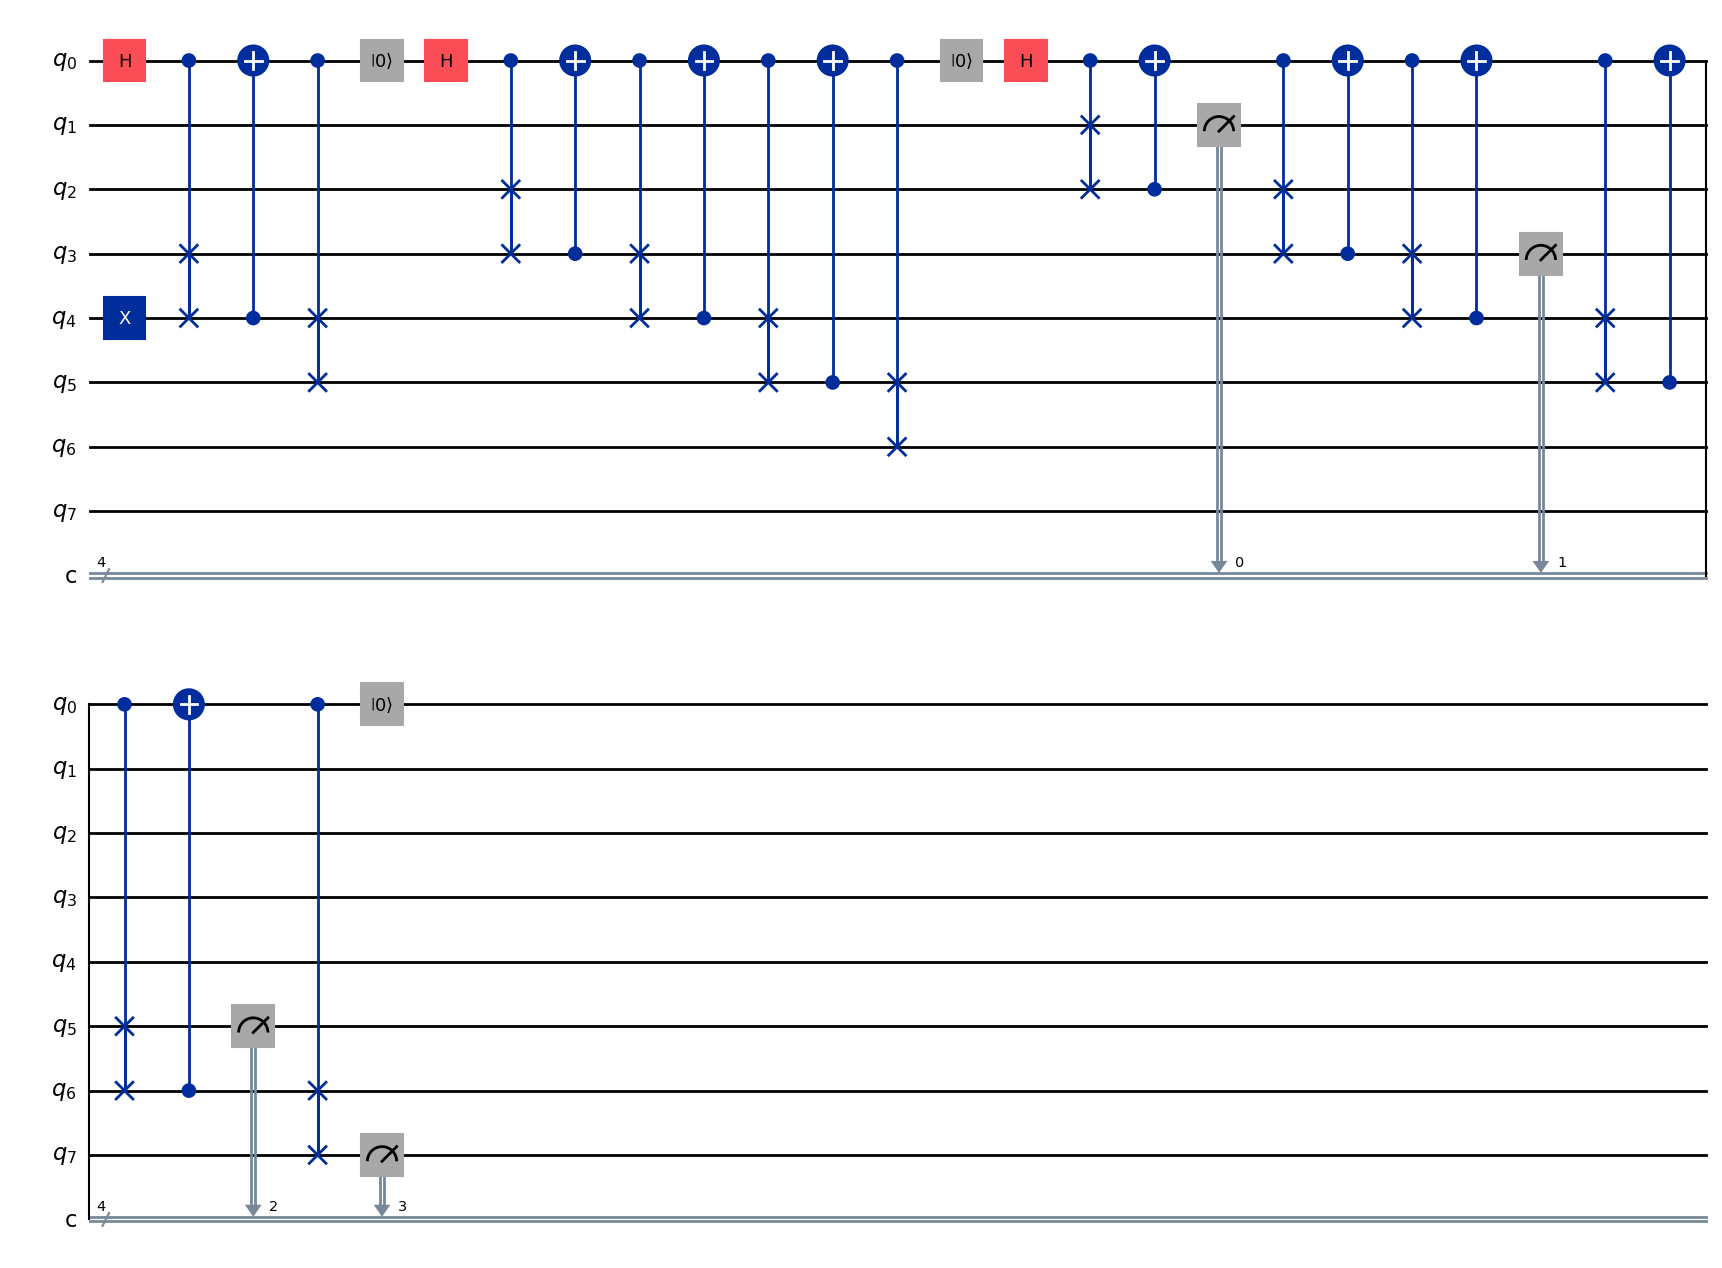

In [20]:
def galton_board_circuit(n):
    qbits = num_of_qbits(n)
    start = qbits // 2
    qc = QuantumCircuit(qbits, n+1)
    qc.x(start)
    curr = start
    count = 1
    while (curr) != 1:
        qc.h(0)
        if (count<2):
            qc = one_peg(qc,curr)
        else:
            qc = multi_swap(qc, start, curr-1, count)
        qc.reset(0)
        curr -= 1
        count += 1
    qc = measure_gb(qc)
    return qc 

galton = galton_board_circuit(3)
galton.draw('mpl')

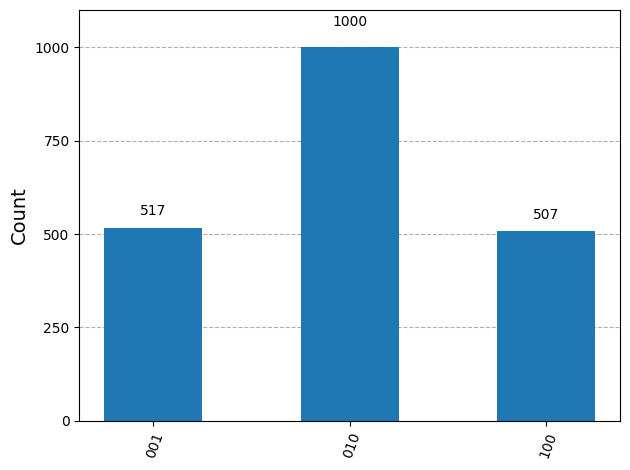

In [74]:
qc = galton_board_circuit(2)
shots = 2024
simulator = AerSimulator()
qc_t = transpile(qc, simulator)
job = simulator.run(qc_t, shots=shots)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [75]:
print(counts)



{'100': 507, '010': 1000, '001': 517}


In [80]:
def mse(counts):
    empirical = []
    expected = []

    keys = list(counts.keys())

    mse = 0 

    for i in range(len(keys)):
        empirical_val = counts[keys[i]]/shots
        empirical.append(empirical_val)
        expected_val = binom.pmf(i, len(keys)-1, 0.5)
        expected.append(expected_val)
        mse += (empirical_val - expected_val)**2

    print(f"mse: {mse}")
    print(f"empirical: {empirical}")
    print(f"empirical_mean: {np.mean(empirical)}; var: {np.var(empirical)}")
    print(f"expected: {expected}")
    print(f"expected: {np.mean(expected)}; var: {np.var(expected)}")
    print(f"counts: {counts}")

sorted_counts = {k: counts[k] for k in sorted(counts.keys())}

mse(sorted_counts)


mse: 6.493227514881035e-05
empirical: [0.2554347826086957, 0.49407114624505927, 0.25049407114624506]
empirical_mean: 0.3333333333333333; var: 0.012922390688115036
expected: [np.float64(0.25), np.float64(0.5000000000000002), np.float64(0.25)]
expected: 0.3333333333333334; var: 0.013888888888888914
counts: {'001': 517, '010': 1000, '100': 507}


In [34]:
a = list(counts.keys())
print(a)

['10', '01']


In [57]:
print(binom.pmf(0,2,0.5))

0.25


-9


In [68]:
for i in range(5):
    print(2*i+1)

1
3
5
7
9
